#### 1. 데이터 불러오기

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

import optuna
import optuna.visualization

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
import pandas as pd

train = pd.read_csv('1. train.csv', encoding='utf-8')
train_x = train.drop(['EC'], axis=1)
train_y = train['EC']

test_x = pd.read_csv('2. test.csv', encoding = 'utf-8')

1-1. train

In [11]:
train.columns

Index(['가중치가 적용된 열전도도 표준편차', '가중치가 적용된 제1이온화 에너지 표준편차', '전자 친화도 엔트로피',
       '가중치가 적용된 원자량의 범위', '가중치가 적용된 열전도도 범위', '평균 전자 친화도', '가중치가 적용된 밀도 범위',
       '가중치가 적용된 기하평균 제1이온화 에너지', '기하평균 원자 반지름', '기하평균 원자량', '평균 열전도도',
       '밀도 표준편차', '가중치가 적용된 평균 전자 친화도', '가중치가 적용된 기하평균 전자 친화도',
       '가중치가 적용된 원자 반지름 범위', 'EC'],
      dtype='object')

In [12]:
train.index

RangeIndex(start=0, stop=10000, step=1)

In [13]:
train.dtypes

가중치가 적용된 열전도도 표준편차          object
가중치가 적용된 제1이온화 에너지 표준편차     object
전자 친화도 엔트로피                 object
가중치가 적용된 원자량의 범위           float64
가중치가 적용된 열전도도 범위           float64
평균 전자 친화도                  float64
가중치가 적용된 밀도 범위             float64
가중치가 적용된 기하평균 제1이온화 에너지    float64
기하평균 원자 반지름                float64
기하평균 원자량                   float64
평균 열전도도                    float64
밀도 표준편차                    float64
가중치가 적용된 평균 전자 친화도         float64
가중치가 적용된 기하평균 전자 친화도       float64
가중치가 적용된 원자 반지름 범위         float64
EC                          object
dtype: object

In [14]:
train.shape

(10000, 16)

In [15]:
train.head()

가중치가 적용된 열전도도 표준편차 가중치가 적용된 제1이온화 에너지 표준편차 전자 친화도 엔트로피  가중치가 적용된 원자량의 범위  \
0          very high                     NaN         NaN         17.885150   
1               high                    high         NaN        196.520968   
2                low                  medium      medium               NaN   
3           very low                very low    very low        287.237188   
4          very high               very high      medium               NaN   

   가중치가 적용된 열전도도 범위  평균 전자 친화도  가중치가 적용된 밀도 범위  가중치가 적용된 기하평균 제1이온화 에너지  \
0         96.349483  58.957309     2108.239631               940.114645   
1               NaN  62.849397             NaN               936.133985   
2         20.227894        NaN             NaN                      NaN   
3          2.750000  49.615000             NaN              1605.622725   
4        365.261803  73.718583     3044.507420               945.529212   

   기하평균 원자 반지름   기하평균 원자량     평균 열전도도       밀도 표준편차  가중치가 적용된 평균 전자 친화도  \
0   146.991058        NaN -295.592054   3190.884100                 NaN   
1   156.763090        NaN         NaN   3019.297658           91.763093   
2   302.013440        NaN -290.466524  19188.276000           63.279096   
3   176.966098        NaN   21.500000  -4382.180562                 NaN   
4   270.794107  57.627297  120.583189           NaN          -26.973819   

   가중치가 적용된 기하평균 전자 친화도  가중치가 적용된 원자 반지름 범위            EC  
0             91.766147           38.654365  Intermediate  
1                   NaN                 NaN  Intermediate  
2             65.229110                 NaN  Intermediate  
3             47.757116           52.500000        Simple  
4                   NaN           21.915312  Intermediate

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   가중치가 적용된 열전도도 표준편차       6999 non-null   object 
 1   가중치가 적용된 제1이온화 에너지 표준편차  7037 non-null   object 
 2   전자 친화도 엔트로피              7008 non-null   object 
 3   가중치가 적용된 원자량의 범위         7002 non-null   float64
 4   가중치가 적용된 열전도도 범위         7030 non-null   float64
 5   평균 전자 친화도                7026 non-null   float64
 6   가중치가 적용된 밀도 범위           7025 non-null   float64
 7   가중치가 적용된 기하평균 제1이온화 에너지  6995 non-null   float64
 8   기하평균 원자 반지름              6993 non-null   float64
 9   기하평균 원자량                 6985 non-null   float64
 10  평균 열전도도                  6992 non-null   float64
 11  밀도 표준편차                  6978 non-null   float64
 12  가중치가 적용된 평균 전자 친화도       6981 non-null   float64
 13  가중치가 적용된 기하평균 전자 친화도     7002 non-null   float64
 14  가중치가 적용된 원자 반지름 범위     

In [17]:
train.describe(include='all')

가중치가 적용된 열전도도 표준편차 가중치가 적용된 제1이온화 에너지 표준편차 전자 친화도 엔트로피  \
count                6999                    7037        7008   
unique                  5                       5           5   
top             very high               very high      medium   
freq                 1430                    1445        1417   
mean                  NaN                     NaN         NaN   
std                   NaN                     NaN         NaN   
min                   NaN                     NaN         NaN   
25%                   NaN                     NaN         NaN   
50%                   NaN                     NaN         NaN   
75%                   NaN                     NaN         NaN   
max                   NaN                     NaN         NaN   

        가중치가 적용된 원자량의 범위  가중치가 적용된 열전도도 범위    평균 전자 친화도  가중치가 적용된 밀도 범위  \
count        7002.000000       7030.000000  7026.000000     7025.000000   
unique               NaN               NaN          NaN             NaN   
top                  NaN               NaN          NaN             NaN   
freq                 NaN               NaN          NaN             NaN   
mean           28.612065         66.099468   143.973715     3076.639787   
std            99.184021        177.458701   108.358616     9326.239828   
min          -229.754327       -399.866656     1.500000   -21578.506420   
25%             6.499218         18.708908    65.030403     1577.151695   
50%            24.031579         56.721954    83.753571     2393.811434   
75%            51.690134        109.077814   220.564344     4813.982946   
max           287.542932        529.101089   408.322131    27856.661310   

        가중치가 적용된 기하평균 제1이온화 에너지  기하평균 원자 반지름     기하평균 원자량      평균 열전도도  \
count               6995.000000  6993.000000  6985.000000  6992.000000   
unique                      NaN          NaN          NaN          NaN   
top                         NaN          NaN          NaN          NaN   
freq                        NaN          NaN          NaN          NaN   
mean                1080.835609   190.931004    65.869618    91.623385   
std                  396.097561    76.262158   117.277064   151.768387   
min                  541.796673    64.798147  -242.930194  -304.580375   
25%                  785.268010   140.018603    40.770130    42.421982   
50%                  940.245671   155.609882    61.233037    98.918329   
75%                 1354.238008   242.464714    89.811778   125.837763   
max                 2041.845721   378.383743   376.111512   488.016631   

             밀도 표준편차  가중치가 적용된 평균 전자 친화도  가중치가 적용된 기하평균 전자 친화도  \
count    6978.000000         6981.000000           7002.000000   
unique           NaN                 NaN                   NaN   
top              NaN                 NaN                   NaN   
freq             NaN                 NaN                   NaN   
mean     3314.249835           88.013952            149.078209   
std      6702.807673          130.893823            118.362727   
min    -14043.063840         -251.828832              1.500000   
25%      1424.240201           51.071556             64.161866   
50%      3402.856196           98.111956             91.745610   
75%      4696.574045          111.612036            229.812754   
max     21100.689660          429.244522            433.364349   

        가중치가 적용된 원자 반지름 범위      EC  
count          7041.000000   10000  
unique                 NaN       3  
top                    NaN  Simple  
freq                   NaN    3482  
mean             50.991062     NaN  
std             129.048428     NaN  
min            -286.558007     NaN  
25%              23.520000     NaN  
50%              40.279530     NaN  
75%              81.400000     NaN  
max             387.782521     NaN

In [18]:
train['가중치가 적용된 열전도도 표준편차'].unique()

array(['very high', 'high', 'low', 'very low', nan, 'medium'],
      dtype=object)

In [19]:
train['가중치가 적용된 제1이온화 에너지 표준편차'].unique()

array([nan, 'high', 'medium', 'very low', 'very high', 'low'],
      dtype=object)

In [20]:
train['전자 친화도 엔트로피'].unique()

array([nan, 'medium', 'very low', 'low', 'very high', 'high'],
      dtype=object)

In [21]:
train['EC'].unique()

array(['Intermediate', 'Simple', 'Complex'], dtype=object)

1-2. test

In [22]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   가중치가 적용된 열전도도 표준편차       1401 non-null   object 
 1   가중치가 적용된 제1이온화 에너지 표준편차  1363 non-null   object 
 2   전자 친화도 엔트로피              1392 non-null   object 
 3   가중치가 적용된 원자량의 범위         1398 non-null   float64
 4   가중치가 적용된 열전도도 범위         1370 non-null   float64
 5   평균 전자 친화도                1374 non-null   float64
 6   가중치가 적용된 밀도 범위           1375 non-null   float64
 7   가중치가 적용된 기하평균 제1이온화 에너지  1405 non-null   float64
 8   기하평균 원자 반지름              1407 non-null   float64
 9   기하평균 원자량                 1415 non-null   float64
 10  평균 열전도도                  1408 non-null   float64
 11  밀도 표준편차                  1422 non-null   float64
 12  가중치가 적용된 평균 전자 친화도       1419 non-null   float64
 13  가중치가 적용된 기하평균 전자 친화도     1398 non-null   float64
 14  가중치가 적용된 원자 반지름 범위      

#### 2. EDA

2-1. 데이터 자료형과 통계량 확인

In [23]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   가중치가 적용된 열전도도 표준편차       6999 non-null   object 
 1   가중치가 적용된 제1이온화 에너지 표준편차  7037 non-null   object 
 2   전자 친화도 엔트로피              7008 non-null   object 
 3   가중치가 적용된 원자량의 범위         7002 non-null   float64
 4   가중치가 적용된 열전도도 범위         7030 non-null   float64
 5   평균 전자 친화도                7026 non-null   float64
 6   가중치가 적용된 밀도 범위           7025 non-null   float64
 7   가중치가 적용된 기하평균 제1이온화 에너지  6995 non-null   float64
 8   기하평균 원자 반지름              6993 non-null   float64
 9   기하평균 원자량                 6985 non-null   float64
 10  평균 열전도도                  6992 non-null   float64
 11  밀도 표준편차                  6978 non-null   float64
 12  가중치가 적용된 평균 전자 친화도       6981 non-null   float64
 13  가중치가 적용된 기하평균 전자 친화도     7002 non-null   float64
 14  가중치가 적용된 원자 반지름 범위     

In [24]:
# 각 변수들의 데이터 통계량을 확인합니다.
train_x.describe(include='all')

가중치가 적용된 열전도도 표준편차 가중치가 적용된 제1이온화 에너지 표준편차 전자 친화도 엔트로피  \
count                6999                    7037        7008   
unique                  5                       5           5   
top             very high               very high      medium   
freq                 1430                    1445        1417   
mean                  NaN                     NaN         NaN   
std                   NaN                     NaN         NaN   
min                   NaN                     NaN         NaN   
25%                   NaN                     NaN         NaN   
50%                   NaN                     NaN         NaN   
75%                   NaN                     NaN         NaN   
max                   NaN                     NaN         NaN   

        가중치가 적용된 원자량의 범위  가중치가 적용된 열전도도 범위    평균 전자 친화도  가중치가 적용된 밀도 범위  \
count        7002.000000       7030.000000  7026.000000     7025.000000   
unique               NaN               NaN          NaN             NaN   
top                  NaN               NaN          NaN             NaN   
freq                 NaN               NaN          NaN             NaN   
mean           28.612065         66.099468   143.973715     3076.639787   
std            99.184021        177.458701   108.358616     9326.239828   
min          -229.754327       -399.866656     1.500000   -21578.506420   
25%             6.499218         18.708908    65.030403     1577.151695   
50%            24.031579         56.721954    83.753571     2393.811434   
75%            51.690134        109.077814   220.564344     4813.982946   
max           287.542932        529.101089   408.322131    27856.661310   

        가중치가 적용된 기하평균 제1이온화 에너지  기하평균 원자 반지름     기하평균 원자량      평균 열전도도  \
count               6995.000000  6993.000000  6985.000000  6992.000000   
unique                      NaN          NaN          NaN          NaN   
top                         NaN          NaN          NaN          NaN   
freq                        NaN          NaN          NaN          NaN   
mean                1080.835609   190.931004    65.869618    91.623385   
std                  396.097561    76.262158   117.277064   151.768387   
min                  541.796673    64.798147  -242.930194  -304.580375   
25%                  785.268010   140.018603    40.770130    42.421982   
50%                  940.245671   155.609882    61.233037    98.918329   
75%                 1354.238008   242.464714    89.811778   125.837763   
max                 2041.845721   378.383743   376.111512   488.016631   

             밀도 표준편차  가중치가 적용된 평균 전자 친화도  가중치가 적용된 기하평균 전자 친화도  \
count    6978.000000         6981.000000           7002.000000   
unique           NaN                 NaN                   NaN   
top              NaN                 NaN                   NaN   
freq             NaN                 NaN                   NaN   
mean     3314.249835           88.013952            149.078209   
std      6702.807673          130.893823            118.362727   
min    -14043.063840         -251.828832              1.500000   
25%      1424.240201           51.071556             64.161866   
50%      3402.856196           98.111956             91.745610   
75%      4696.574045          111.612036            229.812754   
max     21100.689660          429.244522            433.364349   

        가중치가 적용된 원자 반지름 범위  
count          7041.000000  
unique                 NaN  
top                    NaN  
freq                   NaN  
mean             50.991062  
std             129.048428  
min            -286.558007  
25%              23.520000  
50%              40.279530  
75%              81.400000  
max             387.782521

2-2. 데이터 시각화

<Figure size 1200x1200 with 0 Axes>

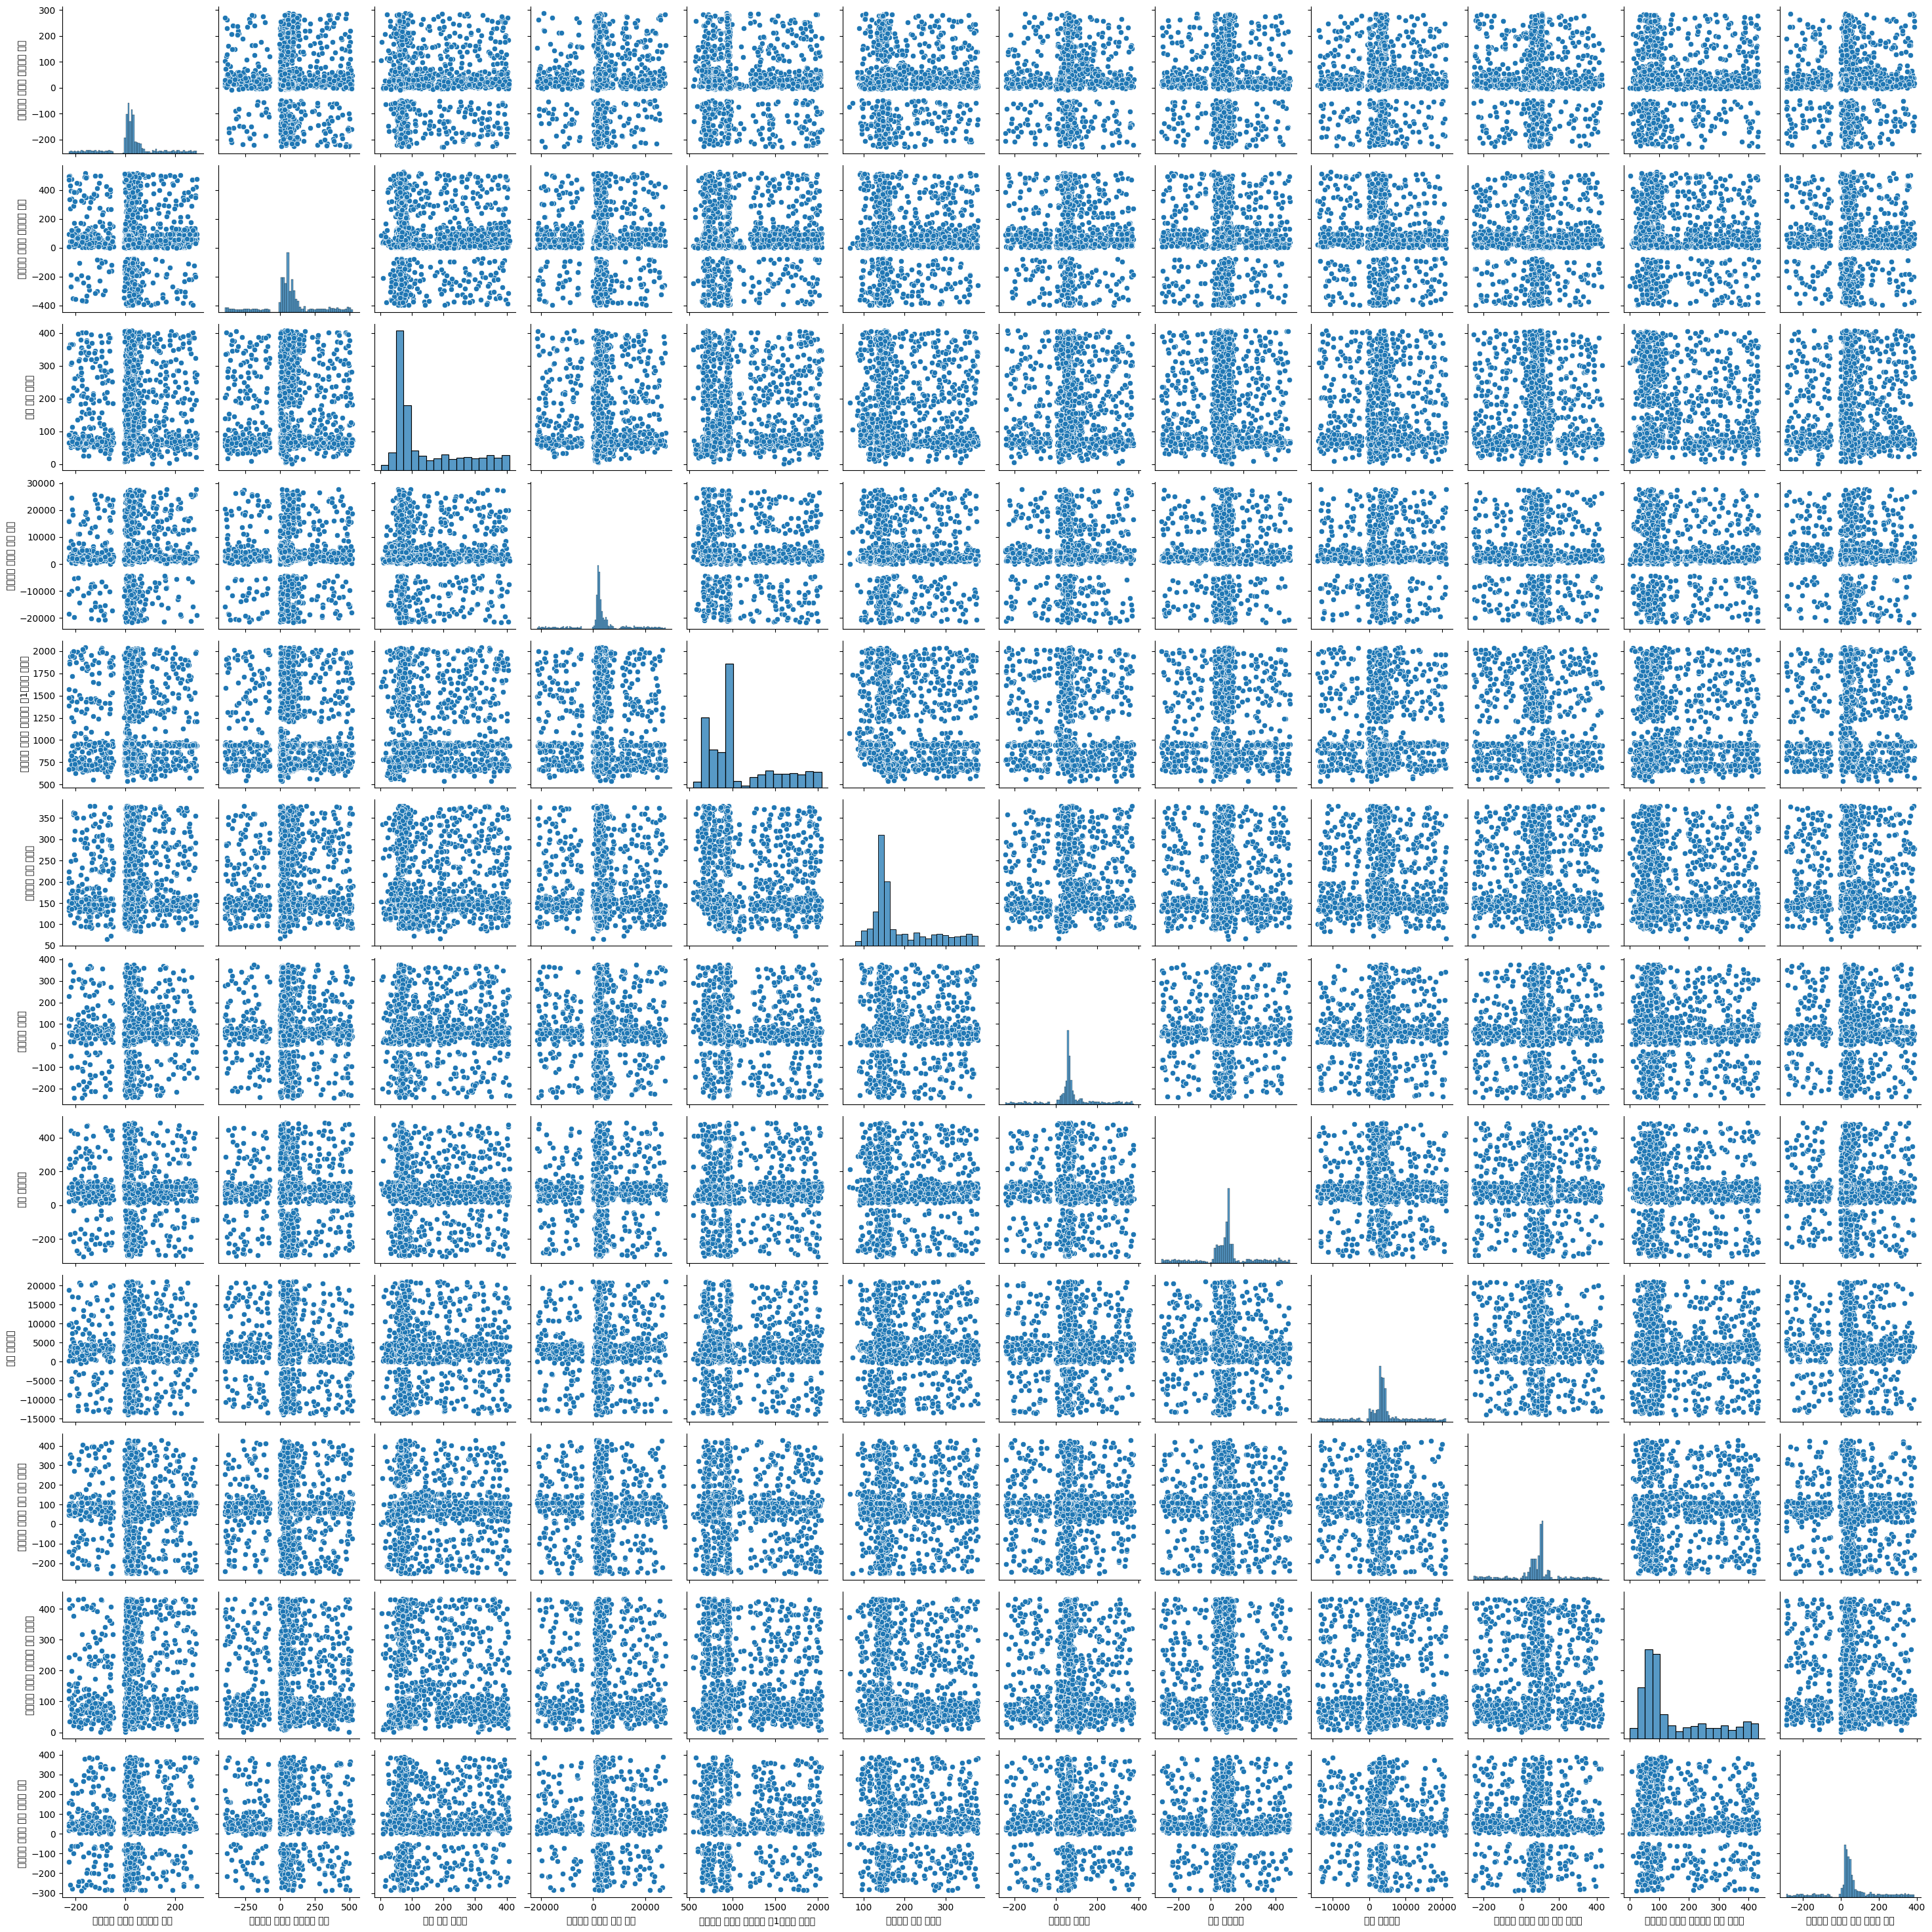

In [27]:
plt.figure(figsize=(12,12))
#sns.pairplot(train)
sns.pairplot(train.sample(3000)) # 오래 걸릴 시 수행
plt.show()

#범주형 변수 확인

In [28]:
train_x.columns

Index(['가중치가 적용된 열전도도 표준편차', '가중치가 적용된 제1이온화 에너지 표준편차', '전자 친화도 엔트로피',
       '가중치가 적용된 원자량의 범위', '가중치가 적용된 열전도도 범위', '평균 전자 친화도', '가중치가 적용된 밀도 범위',
       '가중치가 적용된 기하평균 제1이온화 에너지', '기하평균 원자 반지름', '기하평균 원자량', '평균 열전도도',
       '밀도 표준편차', '가중치가 적용된 평균 전자 친화도', '가중치가 적용된 기하평균 전자 친화도',
       '가중치가 적용된 원자 반지름 범위'],
      dtype='object')

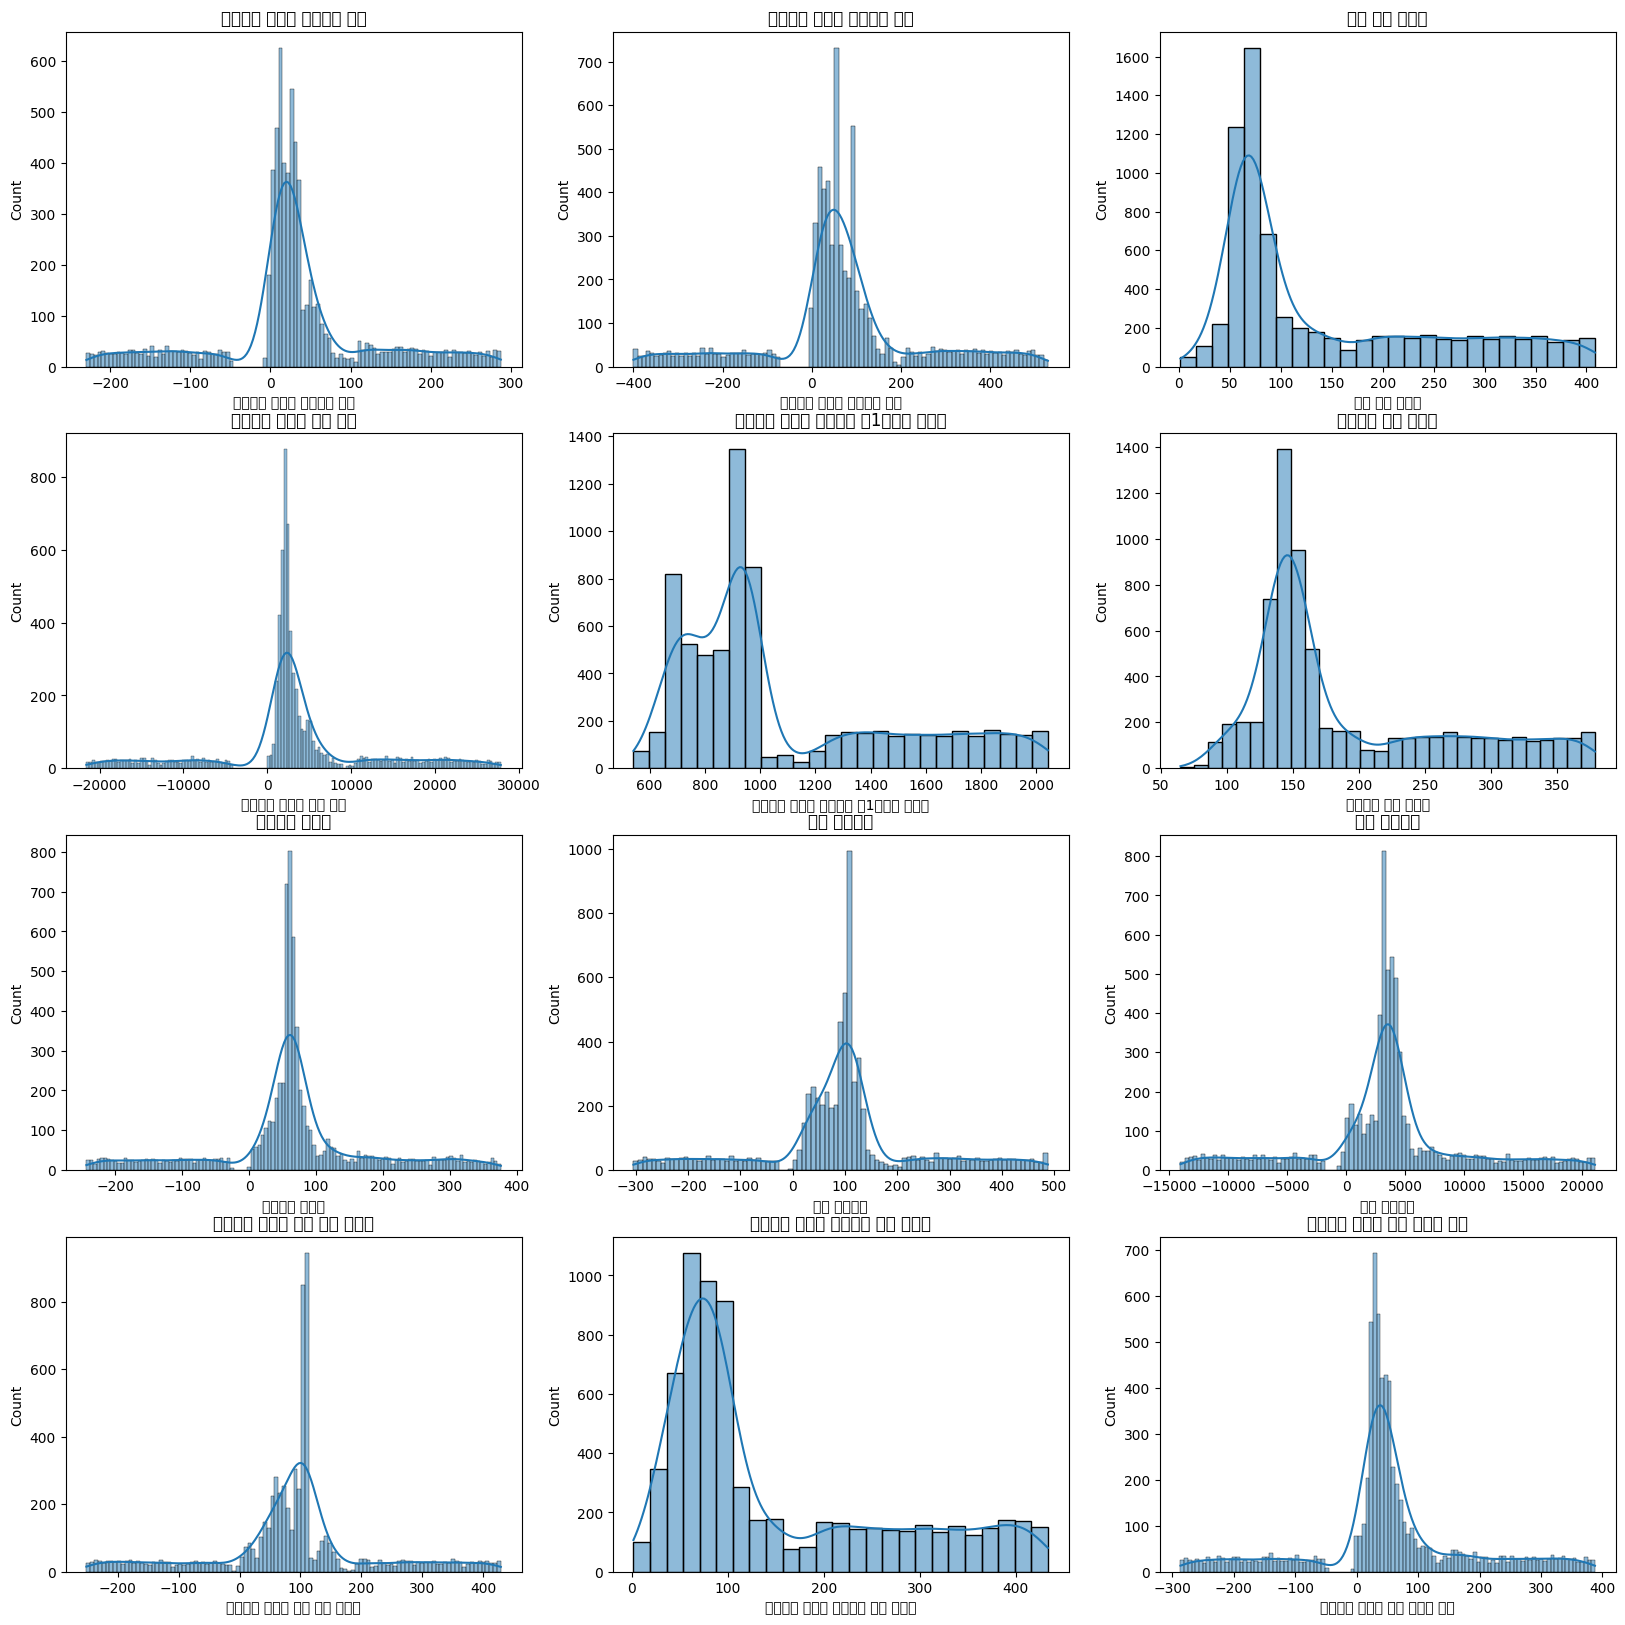

In [ ]:
#범주형 변수는 distplot 생성 불가
fig, axes = plt.subplots(4,3, figsize=(20,20))

sns.histplot(x=train['가중치가 적용된 원자량의 범위'], kde=True, ax=axes[0][0]).set_title('가중치가 적용된 원자량의 범위')
sns.histplot(x=train['가중치가 적용된 열전도도 범위'], kde=True, ax=axes[0][1]).set_title('가중치가 적용된 열전도도 범위')
sns.histplot(x=train['평균 전자 친화도'], kde=True, ax=axes[0][2]).set_title('평균 전자 친화도')
sns.histplot(x=train['가중치가 적용된 밀도 범위'], kde=True, ax=axes[1][0]).set_title('가중치가 적용된 밀도 범위')
sns.histplot(x=train['가중치가 적용된 기하평균 제1이온화 에너지'], kde=True, ax=axes[1][1]).set_title('가중치가 적용된 기하평균 제1이온화 에너지')
sns.histplot(x=train['기하평균 원자 반지름'], kde=True, ax=axes[1][2]).set_title('기하평균 원자 반지름')
sns.histplot(x=train['기하평균 원자량'], kde=True, ax=axes[2][0]).set_title('기하평균 원자량')
sns.histplot(x=train['평균 열전도도'], kde=True, ax=axes[2][1]).set_title('평균 열전도도')
sns.histplot(x=train['밀도 표준편차'], kde=True, ax=axes[2][2]).set_title('밀도 표준편차')
sns.histplot(x=train['가중치가 적용된 평균 전자 친화도'], kde=True, ax=axes[3][0]).set_title('가중치가 적용된 평균 전자 친화도')
sns.histplot(x=train['가중치가 적용된 기하평균 전자 친화도'], kde=True, ax=axes[3][1]).set_title('가중치가 적용된 기하평균 전자 친화도')
sns.histplot(x=train['가중치가 적용된 원자 반지름 범위'], kde=True, ax=axes[3][2]).set_title('가중치가 적용된 원자 반지름 범위')

plt.show()

# 대부분의 변수는 정규분포를 따름

2-3. 범주형 변수 분석

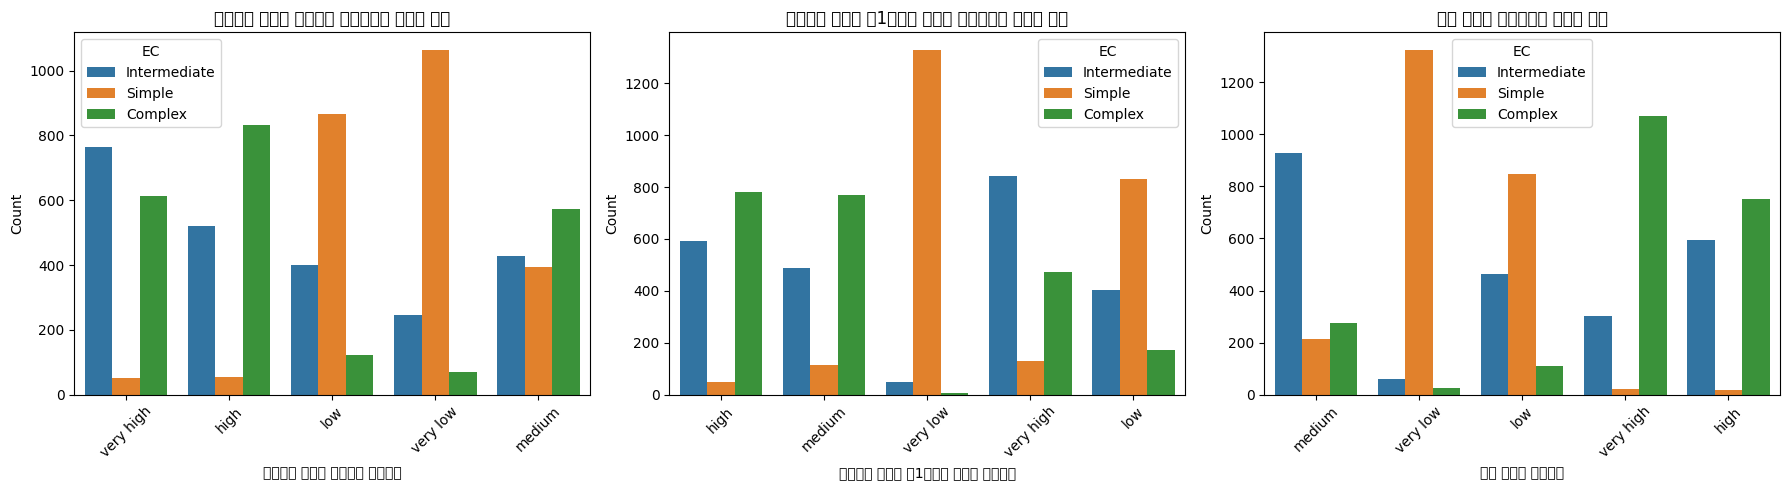


--- 각 범주별 클래스 비율 ---

Feature: 가중치가 적용된 열전도도 표준편차
target              Complex  Intermediate  Simple
가중치가 적용된 열전도도 표준편차                               
high                  0.591         0.370   0.038
low                   0.087         0.288   0.625
medium                0.411         0.307   0.282
very high             0.429         0.535   0.036
very low              0.051         0.177   0.771

Feature: 가중치가 적용된 제1이온화 에너지 표준편차
target                   Complex  Intermediate  Simple
가중치가 적용된 제1이온화 에너지 표준편차                               
high                       0.549         0.416   0.035
low                        0.122         0.287   0.590
medium                     0.560         0.356   0.084
very high                  0.327         0.584   0.089
very low                   0.006         0.035   0.960

Feature: 전자 친화도 엔트로피
target       Complex  Intermediate  Simple
전자 친화도 엔트로피                               
high           0.551         0.436   0.014
low            0.076         

In [31]:
# 분석할 문자형 특성 리스트
categorical_features = ['가중치가 적용된 열전도도 표준편차', '가중치가 적용된 제1이온화 에너지 표준편차', '전자 친화도 엔트로피']

plt.figure(figsize=(18, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i+1)
    sns.countplot(x=train_x[feature], hue=train_y)
    plt.title(f'{feature}별 클래스 분포')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # 라벨이 큰 경우 회전

plt.tight_layout()
plt.show()

print("\n--- 각 범주별 클래스 비율 ---")
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    df_temp = pd.concat([train_x[feature], train_y], axis=1)
    df_temp.columns = [feature, 'target']

    # 각 범주 내에서 클래스 비율 계산
    ratio = (
        df_temp.groupby(feature)['target']
        .value_counts(normalize=True)
        .unstack(fill_value=0)
        .round(3)
    )
    print(ratio)


데이터가 유의미한 정보를 보이지 않는 범주형 변수 제거 (해당없음)

#### 3. 데이터 전처리

3-1. 결측치 처리

In [32]:
# 데이터가 50% 이상 비어있는 컬럼은 삭제

drop_columns = []
for col in train_x.columns:
    if train_x[col].isnull().mean() > 0.5:
        drop_columns.append(col)

print(f"삭제된 컬럼: {drop_columns}")

삭제된 컬럼: []


In [33]:
train_x.drop(drop_columns, axis=1, inplace=True)
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   가중치가 적용된 열전도도 표준편차       6999 non-null   object 
 1   가중치가 적용된 제1이온화 에너지 표준편차  7037 non-null   object 
 2   전자 친화도 엔트로피              7008 non-null   object 
 3   가중치가 적용된 원자량의 범위         7002 non-null   float64
 4   가중치가 적용된 열전도도 범위         7030 non-null   float64
 5   평균 전자 친화도                7026 non-null   float64
 6   가중치가 적용된 밀도 범위           7025 non-null   float64
 7   가중치가 적용된 기하평균 제1이온화 에너지  6995 non-null   float64
 8   기하평균 원자 반지름              6993 non-null   float64
 9   기하평균 원자량                 6985 non-null   float64
 10  평균 열전도도                  6992 non-null   float64
 11  밀도 표준편차                  6978 non-null   float64
 12  가중치가 적용된 평균 전자 친화도       6981 non-null   float64
 13  가중치가 적용된 기하평균 전자 친화도     7002 non-null   float64
 14  가중치가 적용된 원자 반지름 범위     

In [34]:
test_x.drop(drop_columns, axis=1, inplace=True)
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   가중치가 적용된 열전도도 표준편차       1401 non-null   object 
 1   가중치가 적용된 제1이온화 에너지 표준편차  1363 non-null   object 
 2   전자 친화도 엔트로피              1392 non-null   object 
 3   가중치가 적용된 원자량의 범위         1398 non-null   float64
 4   가중치가 적용된 열전도도 범위         1370 non-null   float64
 5   평균 전자 친화도                1374 non-null   float64
 6   가중치가 적용된 밀도 범위           1375 non-null   float64
 7   가중치가 적용된 기하평균 제1이온화 에너지  1405 non-null   float64
 8   기하평균 원자 반지름              1407 non-null   float64
 9   기하평균 원자량                 1415 non-null   float64
 10  평균 열전도도                  1408 non-null   float64
 11  밀도 표준편차                  1422 non-null   float64
 12  가중치가 적용된 평균 전자 친화도       1419 non-null   float64
 13  가중치가 적용된 기하평균 전자 친화도     1398 non-null   float64
 14  가중치가 적용된 원자 반지름 범위      

수치형/범주형 컬럼 구분

In [35]:
num_cols = train_x.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = train_x.select_dtypes(exclude=[np.number]).columns.tolist()

print("수치형 변수:", num_cols)
print("범주형 변수:", cat_cols)

수치형 변수: ['가중치가 적용된 원자량의 범위', '가중치가 적용된 열전도도 범위', '평균 전자 친화도', '가중치가 적용된 밀도 범위', '가중치가 적용된 기하평균 제1이온화 에너지', '기하평균 원자 반지름', '기하평균 원자량', '평균 열전도도', '밀도 표준편차', '가중치가 적용된 평균 전자 친화도', '가중치가 적용된 기하평균 전자 친화도', '가중치가 적용된 원자 반지름 범위']
범주형 변수: ['가중치가 적용된 열전도도 표준편차', '가중치가 적용된 제1이온화 에너지 표준편차', '전자 친화도 엔트로피']


결측치 처리

In [36]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# (1) 수치형 변수 → KNNImputer
if len(num_cols) > 0:
    imputer_num = KNNImputer(n_neighbors=5)
    train_x[num_cols] = imputer_num.fit_transform(train_x[num_cols])
    test_x[num_cols] = imputer_num.transform(test_x[num_cols])
    print("수치형 변수 KNNImputer 완료")

# (2) 범주형 변수 → 최빈값(SimpleImputer)
if len(cat_cols) > 0:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    train_x[cat_cols] = imputer_cat.fit_transform(train_x[cat_cols])
    test_x[cat_cols] = imputer_cat.transform(test_x[cat_cols])
    print("범주형 변수 최빈값 대체 완료")

    print(train_x.info())
    print(test_x.info())

수치형 변수 KNNImputer 완료
범주형 변수 최빈값 대체 완료
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   가중치가 적용된 열전도도 표준편차       10000 non-null  object 
 1   가중치가 적용된 제1이온화 에너지 표준편차  10000 non-null  object 
 2   전자 친화도 엔트로피              10000 non-null  object 
 3   가중치가 적용된 원자량의 범위         10000 non-null  float64
 4   가중치가 적용된 열전도도 범위         10000 non-null  float64
 5   평균 전자 친화도                10000 non-null  float64
 6   가중치가 적용된 밀도 범위           10000 non-null  float64
 7   가중치가 적용된 기하평균 제1이온화 에너지  10000 non-null  float64
 8   기하평균 원자 반지름              10000 non-null  float64
 9   기하평균 원자량                 10000 non-null  float64
 10  평균 열전도도                  10000 non-null  float64
 11  밀도 표준편차                  10000 non-null  float64
 12  가중치가 적용된 평균 전자 친화도       10000 non-null  float64
 13  가중치가 적용된 기하평균 전자 친화도     10000 non-null

3-2. 인코딩(One-Hot / Label) <br>
트리 기반 모델(RF, ET, XGB, LGBM) 사용 예정으로 Label Encoding으로 진행

In [37]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(train, test, cols):

    for c in cols:
        # LabelEncoder 객체 생성
        le = LabelEncoder()

        # train 데이터의 해당 컬럼(c)으로 LabelEncoder 학습
        le.fit(train[c])

        # train 데이터의 해당 컬럼을 수치형으로 변환
        train[c] = le.transform(train[c])

        # test 데이터에만 존재하는 새로운 label이 있을 수 있으므로 예외처리
        # → test 데이터의 모든 고유값(label)을 순회하며, train에서 학습되지 않은 label이면 classes_에 수동 추가
        for label in np.unique(test[c]):
            if label not in le.classes_:
                le.classes_ = np.append(le.classes_, label)

        # 확장된 classes_를 사용해 test 데이터의 해당 컬럼을 수치형으로 변환
        test[c] = le.transform(test[c])

        # 진행 상황 출력
        print(f"컬럼 '{c}' Label Encoding 완료")

    return train, test

train_x_fin, test_x_fin = label_encoding(train_x.copy(), test_x.copy(), cat_cols)

print("전처리 완료: 결측치 대체 + 인코딩 완료")
print(train_x_fin.info())

컬럼 '가중치가 적용된 열전도도 표준편차' Label Encoding 완료
컬럼 '가중치가 적용된 제1이온화 에너지 표준편차' Label Encoding 완료
컬럼 '전자 친화도 엔트로피' Label Encoding 완료
전처리 완료: 결측치 대체 + 인코딩 완료
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   가중치가 적용된 열전도도 표준편차       10000 non-null  int32  
 1   가중치가 적용된 제1이온화 에너지 표준편차  10000 non-null  int32  
 2   전자 친화도 엔트로피              10000 non-null  int32  
 3   가중치가 적용된 원자량의 범위         10000 non-null  float64
 4   가중치가 적용된 열전도도 범위         10000 non-null  float64
 5   평균 전자 친화도                10000 non-null  float64
 6   가중치가 적용된 밀도 범위           10000 non-null  float64
 7   가중치가 적용된 기하평균 제1이온화 에너지  10000 non-null  float64
 8   기하평균 원자 반지름              10000 non-null  float64
 9   기하평균 원자량                 10000 non-null  float64
 10  평균 열전도도                  10000 non-null  float64
 11  밀도 표준편차                  10000 non-nu

In [38]:
print(test_x_fin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   가중치가 적용된 열전도도 표준편차       2000 non-null   int32  
 1   가중치가 적용된 제1이온화 에너지 표준편차  2000 non-null   int32  
 2   전자 친화도 엔트로피              2000 non-null   int32  
 3   가중치가 적용된 원자량의 범위         2000 non-null   float64
 4   가중치가 적용된 열전도도 범위         2000 non-null   float64
 5   평균 전자 친화도                2000 non-null   float64
 6   가중치가 적용된 밀도 범위           2000 non-null   float64
 7   가중치가 적용된 기하평균 제1이온화 에너지  2000 non-null   float64
 8   기하평균 원자 반지름              2000 non-null   float64
 9   기하평균 원자량                 2000 non-null   float64
 10  평균 열전도도                  2000 non-null   float64
 11  밀도 표준편차                  2000 non-null   float64
 12  가중치가 적용된 평균 전자 친화도       2000 non-null   float64
 13  가중치가 적용된 기하평균 전자 친화도     2000 non-null   float64
 14  가중치가 적용된 원자 반지름 범위      

In [40]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le = LabelEncoder()

# 종속변수(train_y)에 대해 fit & transform
train_y_fin = le.fit_transform(train_y)

# 변환 결과 확인
print("변환 전 클래스 목록:", le.classes_)
print("변환 후 값 예시:", np.unique(train_y_fin))


변환 전 클래스 목록: ['Complex' 'Intermediate' 'Simple']
변환 후 값 예시: [0 1 2]


3-3. 다중공선성과 상관관계 확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 수치형 컬럼만 대상으로 진행
feature = train_x_fin.select_dtypes(include=[np.number])

# 상수열(표준편차 0) 제거
feature = feature.loc[:, feature.std() > 0]

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(feature.values, i) for i in range(feature.shape[1])]
vif['features'] = feature.columns

# 다중공선성 높은 변수 리스트
picked = list(vif[vif['VIF Factor'] > 10].features)

print(picked)

vif

[]


VIF Factor                 features
0     4.120073       가중치가 적용된 열전도도 표준편차
1     4.097664  가중치가 적용된 제1이온화 에너지 표준편차
2     2.850789              전자 친화도 엔트로피
3     1.111038         가중치가 적용된 원자량의 범위
4     1.179556         가중치가 적용된 열전도도 범위
5     3.152517                평균 전자 친화도
6     1.147257           가중치가 적용된 밀도 범위
7     7.321047  가중치가 적용된 기하평균 제1이온화 에너지
8     7.085356              기하평균 원자 반지름
9     1.379570                 기하평균 원자량
10    1.474408                  평균 열전도도
11    1.295957                  밀도 표준편차
12    1.565523       가중치가 적용된 평균 전자 친화도
13    2.856341     가중치가 적용된 기하평균 전자 친화도
14    1.199996       가중치가 적용된 원자 반지름 범위

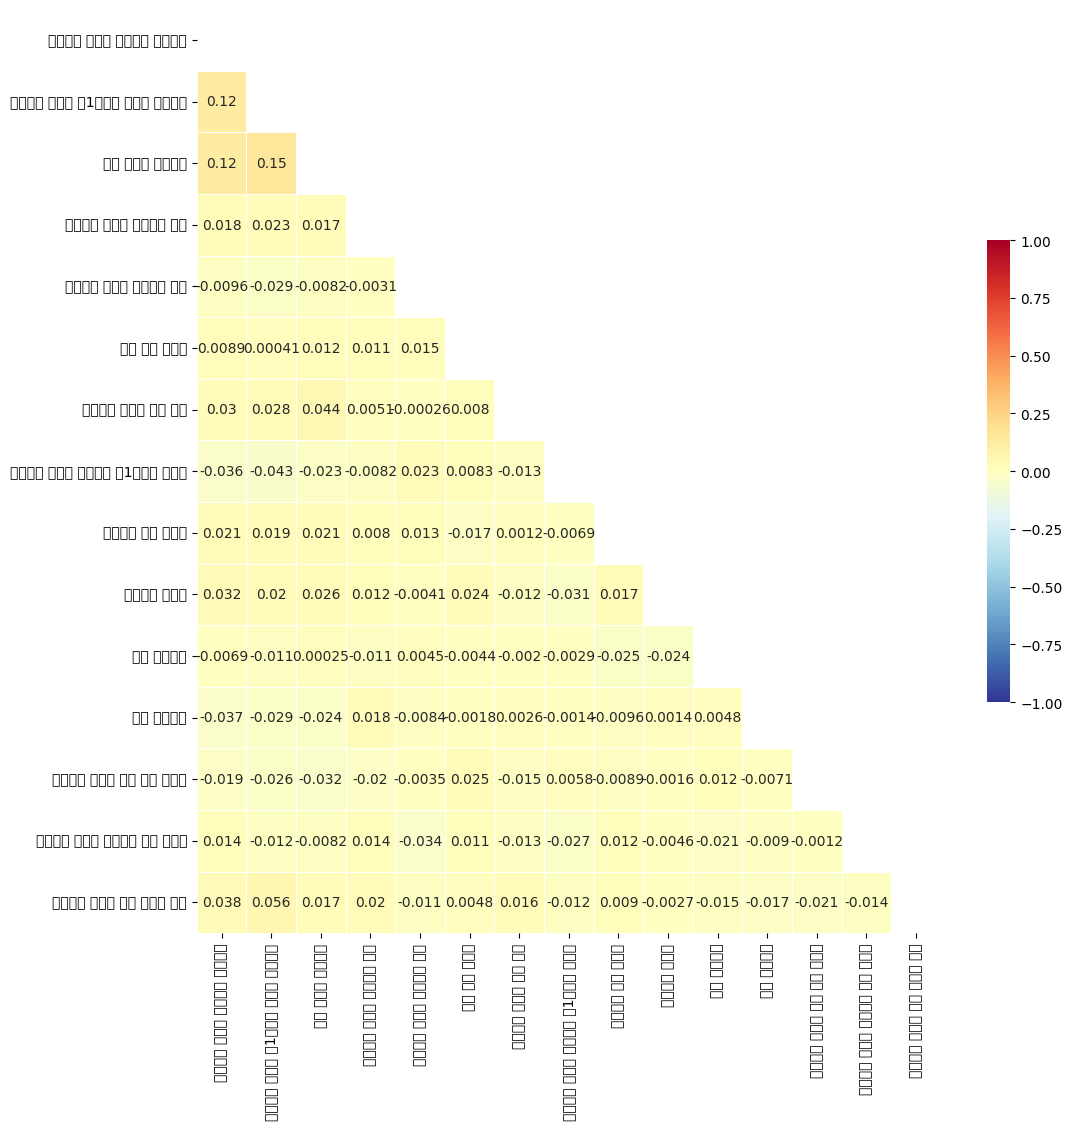

In [42]:
temp = train_x_fin.corr()
#그림 사이즈 지정
fig, ax = plt.subplots(figsize=(12,12))

#삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래쪽 삼각형에 False)
mask = np.zeros_like(temp, dtype=bool)
mask[np.triu_indices_from(mask)] = True

#히트맵 그리기
sns.heatmap(temp,
            cmap='RdYlBu_r',
            annot=True if len(temp.columns) <= 20 else False, #실제값을 표시
            mask=mask,               #표시하지 않을 마스크 부분을 지정
            linewidths = .5,         #경계면 실선으로 구분하기
            cbar_kws={'shrink': .5}, #컬러비 크기 절반으로 줄이기
            vmin = -1, vmax = 1)     #컬러비 범위 -1 ~ 1

plt.show()

In [43]:
def highlight_value(val):
    if abs(val) > 0.8:
        color = 'skyblue'
    elif abs(val) > 0.5:
        color = 'orange'
    else:
        color = ''
    return f"background-color: {color}"

display(temp.style.applymap(highlight_value))

3-4. 변수 선택<br>
train_x_fin(train data) 데이터셋에 다중공선성 존재하는 변수 없음.

3-5. 스케일링 <br>
트리 기반 모델(RF, ET, XGB, LGBM) 사용 예정으로 생략

#### 4. 분석 모델 설계

In [ ]:
# Logistic Regression은 확인용
lr = LogisticRegression()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

4-1. 분석 모델 성능 평가

In [45]:
train_x_splited, val_x, train_y_splited, val_y = train_test_split(train_x_fin, train_y_fin, test_size=0.2, random_state=10)

In [46]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Logistic Regression
lr.fit(train_x_splited, train_y_splited)
lr_pred = lr.predict(val_x)
print("=== Logistic Regression ===")
print("Accuracy :", accuracy_score(val_y, lr_pred))
print("F1 Score :", f1_score(val_y, lr_pred, average='weighted'))
print(confusion_matrix(val_y, lr_pred))
print(classification_report(val_y, lr_pred))
print("\n")

# Random Forest
rf.fit(train_x_splited, train_y_splited)
rf_pred = rf.predict(val_x)
print("=== Random Forest ===")
print("Accuracy :", accuracy_score(val_y, rf_pred))
print("F1 Score :", f1_score(val_y, rf_pred, average='weighted'))
print(confusion_matrix(val_y, rf_pred))
print(classification_report(val_y, rf_pred))
print("\n")

# Extra Trees
et.fit(train_x_splited, train_y_splited)
et_pred = et.predict(val_x)
print("=== Extra Trees ===")
print("Accuracy :", accuracy_score(val_y, et_pred))
print("F1 Score :", f1_score(val_y, et_pred, average='weighted'))
print(confusion_matrix(val_y, et_pred))
print(classification_report(val_y, et_pred))
print("\n")

# XGBoost
xgb.fit(train_x_splited, train_y_splited)
xgb_pred = xgb.predict(val_x)
print("=== XGBoost ===")
print("Accuracy :", accuracy_score(val_y, xgb_pred))
print("F1 Score :", f1_score(val_y, xgb_pred, average='weighted'))
print(confusion_matrix(val_y, xgb_pred))
print(classification_report(val_y, xgb_pred))
print("\n")

# LightGBM
lgbm.fit(train_x_splited, train_y_splited)
lgbm_pred = lgbm.predict(val_x)
print("=== LightGBM ===")
print("Accuracy :", accuracy_score(val_y, lgbm_pred))
print("F1 Score :", f1_score(val_y, lgbm_pred, average='weighted'))
print(confusion_matrix(val_y, lgbm_pred))
print(classification_report(val_y, lgbm_pred))


=== Logistic Regression ===
Accuracy : 0.396
F1 Score : 0.3857129181470798
[[199 166 270]
 [173 188 301]
 [150 148 405]]
              precision    recall  f1-score   support

           0       0.38      0.31      0.34       635
           1       0.37      0.28      0.32       662
           2       0.41      0.58      0.48       703

    accuracy                           0.40      2000
   macro avg       0.39      0.39      0.38      2000
weighted avg       0.39      0.40      0.39      2000



=== Random Forest ===
Accuracy : 0.752
F1 Score : 0.7527980751236248
[[470 147  18]
 [165 434  63]
 [ 20  83 600]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       635
           1       0.65      0.66      0.65       662
           2       0.88      0.85      0.87       703

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



4-2. GridSearchCV를 활용한 하이퍼파라미터 튜닝

In [47]:
param_grid_rf = {
    'n_estimators': [200, 500, 800],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [48]:
param_grid_et = {
    'n_estimators': [200, 500, 800],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

In [49]:
param_grid_xgb = {
    'n_estimators': [300, 500, 700],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [50]:
param_grid_lgbm = {
    'n_estimators': [300, 500, 700],
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [ ]:
models = {
    'RandomForest': (rf, param_grid_rf),
    'ExtraTrees': (et, param_grid_et),
    'XGBoost': (xgb, param_grid_xgb),
    'LightGBM': (lgbm, param_grid_lgbm)
}

grid_search_results = {}

for name, (model, param_grid) in models.items():
    print(f"▶ {name} 모델 탐색 중...")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=3,
        scoring='f1_weighted',   # 분류 문제에 적합한 평가 기준
        n_jobs=-1,
        return_train_score=True,
        verbose=0
    )

    grid_search.fit(train_x_scaled, train_y)
    grid_search_results[name] = grid_search

    print(f"{name} 최적 하이퍼파라미터: {grid_search.best_params_}")
    print(f"{name} 최고 F1 Score: {grid_search.best_score_:.4f}\n")

In [51]:
# 데이터가 10000개 이상
from sklearn.model_selection import GridSearchCV

models = {
    'RandomForest': (rf, param_grid_rf),
    'ExtraTrees': (et, param_grid_et),
    'XGBoost': (xgb, param_grid_xgb),
    'LightGBM': (lgbm, param_grid_lgbm)
}

# 각 모델 내부 병렬(n_jobs)을 제한해 외부 GridSearch 병렬성과 충돌 방지
for m in [rf, et, xgb, lgbm]:
    m.set_params(n_jobs=1)

# GridSearchCV 실행
grid_search_results = {}

for name, (model, param_grid) in models.items():
    print(f"▶ {name} 하이퍼파라미터 탐색 중...")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=3,                         # 데이터가 많을 때는 2~3로 줄여서 속도 개선
        scoring='f1_weighted',        # 회귀용 RMSE 대신 분류용 F1-score로 변경
        n_jobs=-1,                    # 외부 병렬화 허용 (내부는 1로 제한)
        return_train_score=True,
        verbose=1
    )

    grid_search.fit(train_x_fin, train_y_fin)
    grid_search_results[name] = grid_search

    print(f"{name} 최적 파라미터: {grid_search.best_params_}")
    print(f"{name} 최고 F1 Score: {grid_search.best_score_:.4f}\n")


▶ RandomForest 하이퍼파라미터 탐색 중...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
RandomForest 최적 파라미터: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500}
RandomForest 최고 F1 Score: 0.7350

▶ ExtraTrees 하이퍼파라미터 탐색 중...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
ExtraTrees 최적 파라미터: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}
ExtraTrees 최고 F1 Score: 0.7191

▶ XGBoost 하이퍼파라미터 탐색 중...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
XGBoost 최적 파라미터: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
XGBoost 최고 F1 Score: 0.7540

▶ LightGBM 하이퍼파라미터 탐색 중...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tr

Model  Best F1 Score  \
2       XGBoost         0.7540   
3      LightGBM         0.7525   
0  RandomForest         0.7350   
1    ExtraTrees         0.7191   

                                         Best Params  
2  {'learning_rate': 0.05, 'max_depth': 3, 'n_est...  
3  {'learning_rate': 0.01, 'n_estimators': 700, '...  
0  {'max_depth': 20, 'min_samples_split': 5, 'n_e...  
1  {'max_depth': None, 'min_samples_leaf': 2, 'n_...

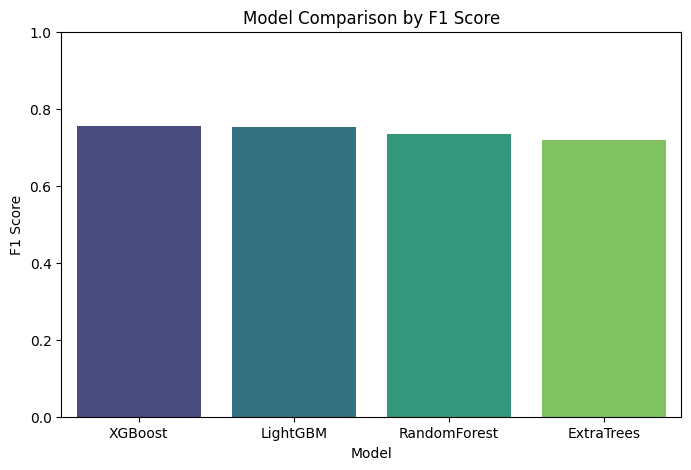

In [52]:

results = []

for name, gs in grid_search_results.items():
    results.append({
        'Model': name,
        'Best F1 Score': round(gs.best_score_, 4), 
        'Best Params': gs.best_params_
    })

# F1-score 기준 내림차순 정렬 (성능 높을수록 좋음)
result_df = pd.DataFrame(results).sort_values('Best F1 Score', ascending=False)

display(result_df)


plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Best F1 Score', data=result_df, palette='viridis')
plt.title('Model Comparison by F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()


In [53]:
rf_best = grid_search_results['RandomForest'].best_estimator_
et_best = grid_search_results['ExtraTrees'].best_estimator_
xgb_best = grid_search_results['XGBoost'].best_estimator_
lgbm_best = grid_search_results['LightGBM'].best_estimator_

#### 5. 모델 학습

In [54]:
# 모델 학습
rf_best.fit(train_x_fin, train_y_fin)
et_best.fit(train_x_fin, train_y_fin)
xgb_best.fit(train_x_fin, train_y_fin)
lgbm_best.fit(train_x_fin, train_y_fin)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3075
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 15
[LightGBM] [Info] Start training from score -1.141937
[LightGBM] [Info] Start training from score -1.100815
[LightGBM] [Info] Start training from score -1.054978


LGBMClassifier(learning_rate=0.01, n_estimators=700, n_jobs=1)

#### 6. 예측값 생성

In [55]:
# Validation set 분리 (Optuna 검증용)

train_x_splited, val_x_optuna, train_y_splited, val_y_optuna = train_test_split(
    train_x_fin, train_y_fin, test_size=0.2, random_state=42
)

# 각 모델의 검증 데이터 예측값 저장
val_probs = {
    'rf': rf_best.predict_proba(val_x_optuna),
    'et': et_best.predict_proba(val_x_optuna),
    'xgb': xgb_best.predict_proba(val_x_optuna),
    'lgbm': lgbm_best.predict_proba(val_x_optuna)
}


In [56]:
# Optuna 목적함수 정의 (RMSE 최소화)

def objective(trial):
    # 가중치 제안
    w1 = trial.suggest_float('w_rf', 0.0, 1.0)
    w2 = trial.suggest_float('w_et', 0.0, 1.0)
    w3 = trial.suggest_float('w_xgb', 0.0, 1.0)
    w4 = trial.suggest_float('w_lgbm', 0.0, 1.0)

    # 가중치 합 1로 정규화
    weights = np.array([w1, w2, w3, w4])
    if np.sum(weights) == 0:
        return 0
    weights /= np.sum(weights)

    # 각 모델의 예측값(클래스 레이블)을 가중평균 → 확률이 없으므로 다수결 기반으로 근사
    blended_prob = (
    weights[0] * val_probs['rf'] +
    weights[1] * val_probs['et'] +
    weights[2] * val_probs['xgb'] +
    weights[3] * val_probs['lgbm']
    )

    # 클래스별 확률 중 가장 높은 값 선택
    blended_pred = np.argmax(blended_prob, axis=1)

    # F1-score 계산
    f1 = f1_score(val_y_optuna, blended_pred, average='weighted')
    return f1


[I 2025-10-23 14:49:56,272] A new study created in memory with name: no-name-db0fbd6d-3e21-4c6a-b3c0-6ea9f4b46e62
Best trial: 36. Best value: 0.994506:  37%|███▋      | 37/100 [00:00<00:00, 229.74it/s]

[I 2025-10-23 14:49:56,275] Trial 0 finished with value: 0.9860133082403549 and parameters: {'w_rf': 0.4453808834302163, 'w_et': 0.8109995343077697, 'w_xgb': 0.0722516331544164, 'w_lgbm': 0.2275438050551667}. Best is trial 0 with value: 0.9860133082403549.
[I 2025-10-23 14:49:56,280] Trial 1 finished with value: 0.9291993283858451 and parameters: {'w_rf': 0.8061659766762365, 'w_et': 0.09265753577694902, 'w_xgb': 0.3234041067261799, 'w_lgbm': 0.8164507931302614}. Best is trial 0 with value: 0.9860133082403549.
[I 2025-10-23 14:49:56,282] Trial 2 finished with value: 0.9236428606080657 and parameters: {'w_rf': 0.2168283172863017, 'w_et': 0.5158161132039518, 'w_xgb': 0.6403930784066441, 'w_lgbm': 0.024370395550974866}. Best is trial 0 with value: 0.9860133082403549.
[I 2025-10-23 14:49:56,285] Trial 3 finished with value: 0.9498538877494505 and parameters: {'w_rf': 0.29373747276525386, 'w_et': 0.8050254286985185, 'w_xgb': 0.3552316595820745, 'w_lgbm': 0.32972114398522934}. Best is trial 0

[I 2025-10-23 14:49:56,464] Trial 38 finished with value: 0.9413343389931503 and parameters: {'w_rf': 0.915696342491789, 'w_et': 0.42272427469902696, 'w_xgb': 0.3456309209752747, 'w_lgbm': 0.9984446692157161}. Best is trial 36 with value: 0.994506134898679.
[I 2025-10-23 14:49:56,471] Trial 39 finished with value: 0.9915098553839307 and parameters: {'w_rf': 0.8121379653805596, 'w_et': 0.1637229426221956, 'w_xgb': 0.05457852812756839, 'w_lgbm': 0.05837039519285613}. Best is trial 36 with value: 0.994506134898679.
[I 2025-10-23 14:49:56,478] Trial 40 finished with value: 0.9292082870865188 and parameters: {'w_rf': 0.8062829336537185, 'w_et': 0.15189857340701507, 'w_xgb': 0.6282872223958775, 'w_lgbm': 0.4465830502236172}. Best is trial 36 with value: 0.994506134898679.
[I 2025-10-23 14:49:56,483] Trial 41 finished with value: 0.9910118879190939 and parameters: {'w_rf': 0.8152340432362734, 'w_et': 0.3197516918380174, 'w_xgb': 0.06569225158071423, 'w_lgbm': 0.06057694021308725}. Best is tri

Best trial: 93. Best value: 0.994507: 100%|██████████| 100/100 [00:00<00:00, 182.49it/s]


[I 2025-10-23 14:49:56,646] Trial 70 finished with value: 0.9915108154359573 and parameters: {'w_rf': 0.8285440478207726, 'w_et': 0.251523727015308, 'w_xgb': 0.0566262579501588, 'w_lgbm': 0.07828318804628426}. Best is trial 36 with value: 0.994506134898679.
[I 2025-10-23 14:49:56,652] Trial 71 finished with value: 0.9915154469072549 and parameters: {'w_rf': 0.9122262351995987, 'w_et': 0.46936107087383416, 'w_xgb': 0.08691683948921111, 'w_lgbm': 0.029842729307490035}. Best is trial 36 with value: 0.994506134898679.
[I 2025-10-23 14:49:56,658] Trial 72 finished with value: 0.9930075413582934 and parameters: {'w_rf': 0.9388415508206283, 'w_et': 0.3414017808104972, 'w_xgb': 0.0035280541111171737, 'w_lgbm': 0.12080520149658995}. Best is trial 36 with value: 0.994506134898679.
[I 2025-10-23 14:49:56,663] Trial 73 finished with value: 0.9930075413582934 and parameters: {'w_rf': 0.9306039773072897, 'w_et': 0.35513375385037177, 'w_xgb': 0.00293824327031654, 'w_lgbm': 0.13230341908079324}. Best 

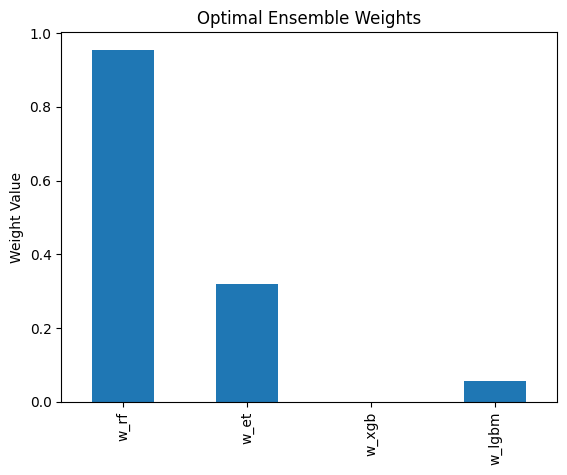

In [57]:
# Optuna 탐색 실행

# F1-score 최대화를 목표로 설정
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

# 최적 가중치 및 F1-score 출력
best_weights = study.best_params
print("Optuna Best F1 Score:", study.best_value)
print("Optuna Best Weights:", best_weights)

# 최적화 과정 시각화
optuna.visualization.plot_optimization_history(study).show()

# 최적 가중치 시각화 (막대그래프)
pd.Series(best_weights).plot(kind='bar', title='Optimal Ensemble Weights')
plt.ylabel('Weight Value')
plt.show()

In [58]:
# 최적 가중치로 Test 데이터 예측

weights = np.array(list(best_weights.values()))
weights /= np.sum(weights)

test_probs = {
    'rf': rf_best.predict_proba(test_x_fin),
    'et': et_best.predict_proba(test_x_fin),
    'xgb': xgb_best.predict_proba(test_x_fin),
    'lgbm': lgbm_best.predict_proba(test_x_fin)
}

blended_test_prob = (
    weights[0] * test_probs['rf'] +
    weights[1] * test_probs['et'] +
    weights[2] * test_probs['xgb'] +
    weights[3] * test_probs['lgbm']
)

final_pred = np.argmax(blended_test_prob, axis=1)

print("최종 예측 완료")
print("예측 결과 shape:", final_pred.shape)
print("예측 클래스 분포:\n", np.unique(final_pred, return_counts=True))

최종 예측 완료
예측 결과 shape: (2000,)
예측 클래스 분포:
 (array([0, 1, 2], dtype=int64), array([680, 653, 667], dtype=int64))


#### 7. 제출 파일 생성

In [66]:
submission = pd.read_csv('3. Sample_submission.csv', encoding = 'utf-8')
submission.head(5)

EC
0  Intermediate
1       Complex
2        Simple
3  Intermediate
4       Complex

In [67]:
submission['EC'] = final_pred
submission.head(5)

EC
0   1
1   0
2   0
3   0
4   0

In [68]:
submission['EC'] = np.where(submission['EC'] == 0, 'Complex', 
                            np.where(submission['EC'] == 1, 'Intermediate', 'Simple'))

submission.head(20)

EC
0   Intermediate
1        Complex
2        Complex
3        Complex
4        Complex
5        Complex
6         Simple
7        Complex
8        Complex
9   Intermediate
10  Intermediate
11        Simple
12  Intermediate
13  Intermediate
14       Complex
15       Complex
16       Complex
17  Intermediate
18       Complex
19  Intermediate

In [69]:
submission.to_csv('submit.csv', index=False)